Αικατερίνη Δρακάκη <br>
1115201300041 <br>
Νικόλαος Μακρυγεώργος <br>
1115201500238

****
****
# Bonus  :  Round  - Robin
****
****

Εχουμε 3 κατηγορίες άρα θα έχουμε 3(3-1)/2 = 3  προβληματα. <br>
Αυτα θα είναι τα : Positive - Negative,  Positive - Neutral,  Negative - Neutral

In [3]:
import nltk
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
from pandas import DataFrame
from collections import Counter
#nltk.download('all')
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import random as random
import combi
from combi import *

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
warnings.filterwarnings("ignore", category=DeprecationWarning)

import gensim
from gensim.models import Word2Vec 
from gensim.test.utils import common_texts, get_tmpfile
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.manifold import TSNE

from sklearn import metrics
from nltk import sent_tokenize     # sentences = sent_tokenize(text)     xorizei se protaseiis   lista me protaseis

from nltk import word_tokenize     # tokens = word_tokenize(text)        xorizei to keimeno se lexeis lista me lexeis
from collections import Counter      # count = Counter(tokens)    print(count.most_common(10))   emfanizei tis 10 lexeis me tin
                                     # megaliteri sixnotita kai poia einai auth  
#nltk.download(u'stopwords')
from nltk.corpus import stopwords
from nltk.stem import StemmerI, RegexpStemmer, LancasterStemmer, ISRIStemmer, PorterStemmer, SnowballStemmer, RSLPStemmer

Διαβάζουμε τα τεστ tweets και το συναίσθημα τους.<br>
Κάνουμε μικρό καθαρισμό. <br>
Βαζουμε τα tweets σε λίστα.

In [4]:
test_results = []
stop__words = set(stopwords.words('english'))
with open("SemEval2017_task4_subtaskA_test_english_gold.txt", encoding="utf8" ) as test_results__:
    for line in test_results__:
        field = line.split()
        test_results.append(field[1])

#print (len(test_results))

str_tweets = ""
with open("test2017.tsv", encoding="utf8" ) as test_tweets__:
    for line in test_tweets__:
        field = line.split()
        line = line.lower()
        list = []
        list = line.split()
        for i in range(len(list)):
            if i > 2 and list[i] not in stop__words and len(list[i]) > 1:
                str_tweets+=list[i]
                str_tweets+=" "
        str_tweets+="\n"
        del list[:]
        
str_tweets = str_tweets.replace('#','').replace('@','').replace('-',' ').replace('@','').replace('!','').replace('?','')
str_tweets = str_tweets.replace(',',' ').replace('.','').replace('*',' ').replace(':',' ').replace('(',' ').replace(')',' ')

test_tweetList = []
test_tweetList = str_tweets.split("\n")
test_tweetList.pop(12284)
#print (len(test_tweetList))

''

Διαβάζουμε τα train tweets και το συναίσθημα τους.
Κάνουμε καθαρισμό.
Βάζουμε τα tweets σε λίστα.

In [3]:
small_character_tweets = ""
results = []
stop__words = set(stopwords.words('english'))

with open("train2017.tsv", encoding="utf8" ) as file_in_put:
    for line in file_in_put:
        field = line.split()
        results.append(field[2]);
        line = line.lower()
        list = []
        list = line.split()
        for i in range(len(list)):
            if i > 2 and list[i] not in stop__words and len(list[i]) > 1:
                small_character_tweets+=list[i]     
                small_character_tweets+=" "                
        small_character_tweets+="\n"
    del list[:]

results.pop(25108)
#print (len(results))

'neutral'

In [4]:
small_character_tweets = small_character_tweets.replace(',','').replace('-','').replace('_','').replace('<','')
small_character_tweets = small_character_tweets.replace('>','').replace('"  "" "', '').replace('#','')
small_character_tweets = small_character_tweets.replace('&','').replace('+','').replace('=','').replace('/','')
small_character_tweets = small_character_tweets.replace('(','').replace(')','').replace(':','').replace('!','')
small_character_tweets = small_character_tweets.replace('?','').replace(';','').replace('$','')
small_character_tweets = small_character_tweets.replace("'m"," am").replace('.','')
small_character_tweets = small_character_tweets.replace('"\"','').replace('\\','').replace('\'s','').replace('\'','')
small_character_tweets = small_character_tweets.replace('@','').replace('u2019',' ').replace('u002c','')



tweets2 = ""
tweets2 = re.sub(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)', r' user ', small_character_tweets)
tweets2 = ' '.join(word for word in tweets2.split(' ') if not word.startswith('http'))

tweetList = []
tweetList = tweets2.split('\n')        #clean tweets on a list
tweetList.pop(len(tweetList)-1)
tweetList.pop(25108)                   # itan keno   #################
print (len(tweetList))

28060


Φτιάχνουμε 6 λίστες όσες και οι κατηγορίες προβλημάτων και για καθε λίστα άλλη μια με το συναίσθημα. <br>
Λίστα με τα θετικά και αρνητικά, λίστα με τα θετικά και ουδέτερα και λίστα με τα αρνητικά και ουδέτερα tweets.

In [5]:
Pos_Neg_tweets = []
Pos_Neg_tweets_resul = []

Pos_Neu_tweets = []
Pos_Neu_tweets_resul = []

Neg_Neu_tweets = []
Neg_Neu_tweets_resul = []


for i in range(len(tweetList)):
    if results[i] == "positive" or results[i] == "negative":
        Pos_Neg_tweets.append(tweetList[i])
        Pos_Neg_tweets_resul.append(results[i])
        
    if results[i] == "positive" or results[i] == "neutral":
        Pos_Neu_tweets.append(tweetList[i])
        Pos_Neu_tweets_resul.append(results[i])
        
    if results[i] == "negative" or results[i] == "neutral":
        Neg_Neu_tweets.append(tweetList[i])
        Neg_Neu_tweets_resul.append(results[i])

χρησιμοποιούμε bag of words   και   KNN
*******
Κάνουμε Bag of words.

In [6]:
# Bag of words για θετικά και αρνητικα
vectorizer_P_Neg = CountVectorizer(max_features=200)
X1 = vectorizer_P_Neg.fit_transform(Pos_Neg_tweets) ####

#print(vectorizer_Bag.get_feature_names())
#print(X1.toarray())
#print (X1.shape)
list_vector_P_Neg = X1.toarray()
#print (len(list_vector_P_Neg))

In [7]:
# Bag of words για θετικά και ουδετερα
vectorizer_P_Neu = CountVectorizer(max_features=200)
X2 = vectorizer_P_Neu.fit_transform(Pos_Neu_tweets) ###


#print (X2.shape)
list_vector_P_Neu = X2.toarray()
#print (len(list_vector_P_Neu))

In [8]:
# Bag of words για αρνητικα και ουδετερα
vectorizer_Neg_Neu = CountVectorizer(max_features=200)
X3 = vectorizer_Neg_Neu.fit_transform(Neg_Neu_tweets) ###


#print (X3.shape)
list_vector_Neg_Neu = X3.toarray()
#print (len(list_vector_Neg_Neu))

In [9]:
#Bag of words για όλα τα train και test
vectorizer_train = CountVectorizer(max_features=200)
X_train = vectorizer_train.fit_transform(tweetList)
list_train = X_train.toarray()


vectorizer_test = CountVectorizer(max_features=200)
X_test = vectorizer_test.fit_transform(test_tweetList)
list_test = X_test.toarray()

Κάνουμε ΚΝΝ.

Χρήση της predict() για τα δεδομένα του test

In [10]:
# εκπαιδευω μονο για θετικα και αρνητικα

knn1 = KNeighborsClassifier(algorithm='brute', n_neighbors=1)
knn1.fit(list_vector_P_Neg, Pos_Neg_tweets_resul) 

# κανουμε predict  και τα train και τα test
results_1 = knn1.predict_proba(X_train)
results_4 = knn1.predict_proba(X_test)

In [11]:
# εκπαιδευω μόνο για θετιά και ουδέτερα

knn2 = KNeighborsClassifier(algorithm='brute', n_neighbors=1)
knn2.fit(list_vector_P_Neu, Pos_Neu_tweets_resul)

results_2 = knn2.predict_proba(X_train)
results_5 = knn2.predict_proba(X_test)

In [12]:
# εκπαιδεύω μόνο για αρνητικά και ουδετερα

knn3 = KNeighborsClassifier(algorithm='brute', n_neighbors=1)
knn3.fit(list_vector_Neg_Neu, Neg_Neu_tweets_resul)

results_3 = knn3.predict_proba(X_train)
results_6 = knn3.predict_proba(X_test)

Χρήση της predict() για τα δεδομένα του train

In [13]:
knn_train = []
knn_test = []


for i in range(len(list_train)):
    A = []
    A.append(results_1[i][0])
    A.append(results_1[i][1])
    A.append(results_2[i][0])
    A.append(results_2[i][1])
    A.append(results_3[i][0])
    A.append(results_3[i][1])
    knn_train.append(A)
    
    
for j in range(len(list_test)):
    B = []
    B.append(results_4[j][0])
    B.append(results_4[j][1])
    B.append(results_5[j][0])
    B.append(results_5[j][1])
    B.append(results_6[j][0])
    B.append(results_6[j][1])
    knn_test.append(B)

In [14]:
Knn = KNeighborsClassifier(n_neighbors=200)
Knn.fit(knn_train, results)

apotel = Knn.predict(knn_test)
print(metrics.accuracy_score(apotel, test_results))

0.4786714425268642


****
****
****
#         Τελικά αποτελέσματα για τους διαφορετικούς ταξινομητές και διανύσματα.
****
****

In [5]:
def graph_1(l1,l2):
    
    y_pos = np.arange(len(l1))
    plt.barh(y_pos, l2, align='center', alpha=1)
    plt.yticks(y_pos, l1)
    plt.xlabel('Success')
    plt.title('Results')

x = []
y = []
x.append(0.36)
x.append(0.33)
x.append(0.56)
x.append(0.58)

x.append(0.48)
x.append(0.48)
x.append(0.57)
x.append(0.56)

x.append(0.47)

y.append("SVM - BOW")
y.append("SVM - TfIdf")
y.append("SVM - Embeddings")
y.append("SVM - Embeddings + features")

y.append("KNN - BOW")
y.append("KNN - TfIdf")
y.append("KNN - Embeddings")
y.append("KNN - Embeddings + features")

y.append("RR - BOW")

*********
*********

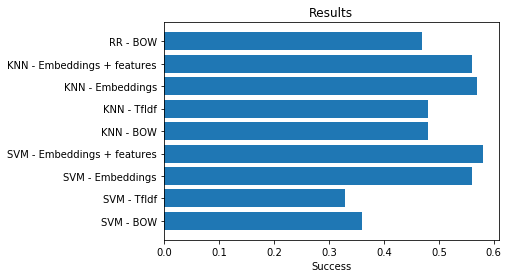

In [6]:
graph_1(y,x)

Συγκεκριμένα : <br>

Για KNN - BOW         έχουμε 48% επιτυχία <br>
Για KNN - TfIdf       έχουμε 48% επιτυχία <br>
Για KNN - Embeddings  έχουμε 57% επιτυχία <br>
Για ΚΝΝ - Embeddings + new features  έχουμε 56% επιτυχία <br>
<br>
Για SVM - BOW         έχουμε 36% επιτυχία <br>
Για SVM - TfIdf       έχουμε 33% επιτυχία <br>
Για SVM - Embeddings  έχουμε 56% επιτυχία <br>
Για SVM - Embeddings + new features  έχουμε 58% επιτυχία <br>

Για Round Robin - BOW έχουμε 47% επιτυχία  <br>
<br>
<br>
Συμπεράσματα : <br>
<br>
Βλέπουμε οτι στις περιπτώσεις των Embeddings τόσο για τον ΚΝΝ όσο και για τον SVM <br>
είμαστε αρκετά παραπάνω απο το 33%,αυτό σημαίνει οτι το αποτέλεσμα δεν προκύπτει τυχαία. <br>
Επίσης και για την μέθοδο BOW και για τον ταξινομητή ΚΝΝ πειραματίζοντας με τον αριθμό των γειτόνων <br>
βλέπουμε οτι δεν έχει άσχημο αποτέλεσμα.